In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [2]:
def PolynomialRegression(degree=2, **kwargs):
    return Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('poly', PolynomialFeatures(degree=degree)),
    ('linreg', LinearRegression(fit_intercept=False))
    ])

## 9. Data analysis lab

Now, put together everything that you've learned over the last few units (prediction error, bias and variance; methods for estimating test/prediction error; regularization techniques) and apply it to a data analysis problem.  Returning to the diabetes dataset, your goal is to create a machine learning model that can accurately predict the diabetes risk.

In [3]:
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [4]:
print(X_diabetes.shape)
print(y_diabetes.shape)

(442, 10)
(442,)


In [5]:
df = load_diabetes(as_frame=True)
df.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


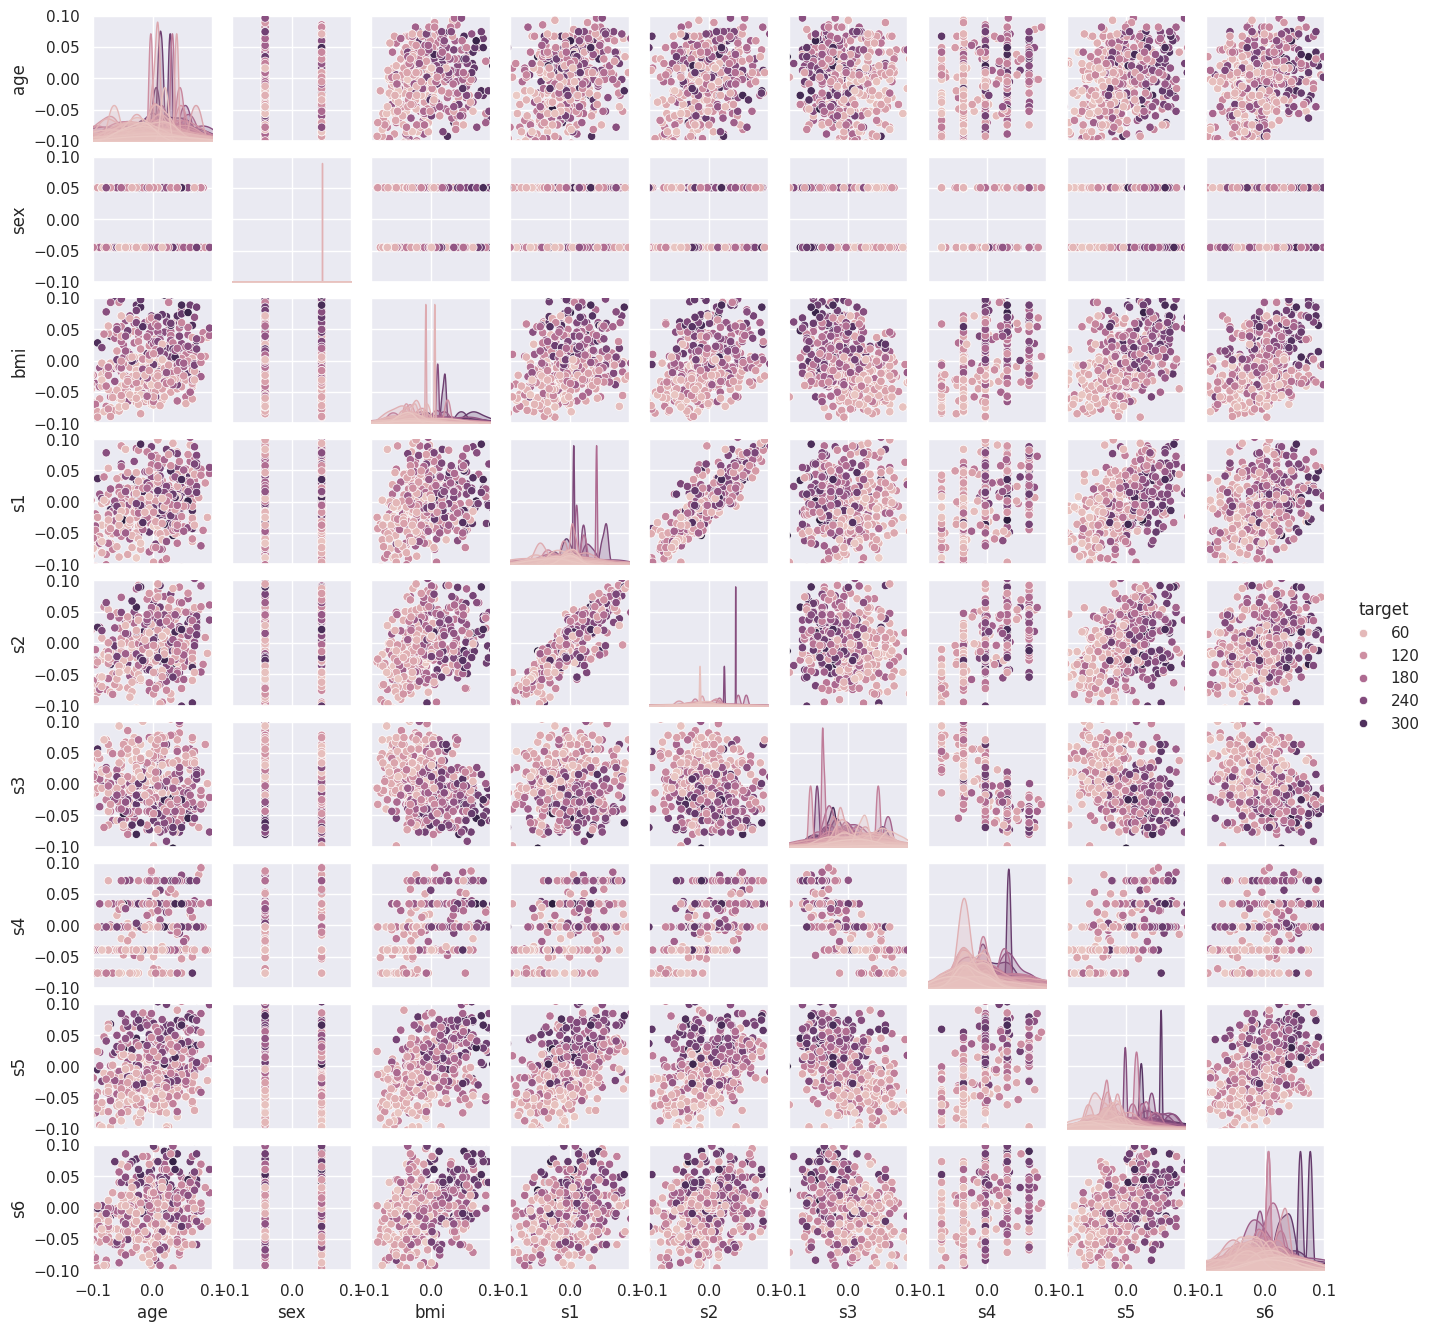

In [6]:
%matplotlib inline

import seaborn as sns; sns.set()

#s1 and s2 correlate somewhat

g = sns.pairplot(data=df.frame,
             x_vars=['age','sex','bmi','s1','s2','s3','s4','s5','s6'],
             y_vars=['age','sex','bmi','s1','s2','s3','s4','s5','s6'],
             hue='target', height=1.5)

for ax in g.axes.flatten():
    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(-0.1, 0.1)

# Show plot
plt.show()

In [7]:
df.frame.isna().sum()
#No NAN in the data

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [8]:
# Create and fit a simple LinearRegression model
X = X_diabetes
y = y_diabetes

model = LinearRegression()
model.fit(X,y)
# Create and fit a simple LinearRegression model


def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

R^2: 0.5177484222203499 MSE: 2859.69634758675


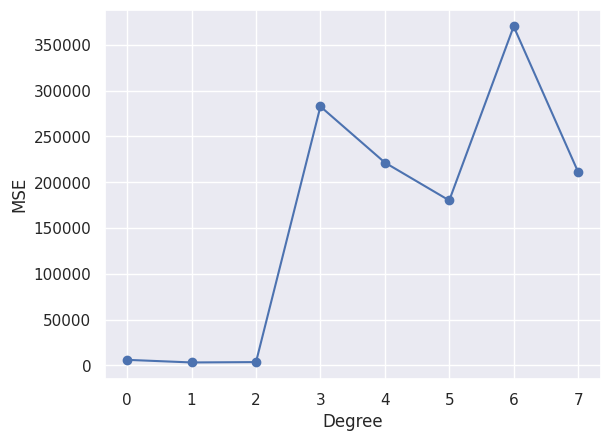

In [9]:
err = []
degrees = range(8)

kf = KFold(n_splits=5, shuffle=True)

for degree in degrees:
    # Make our model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])

    # Fit the model
    res = cross_val_score(model, X, y, cv=kf, scoring=mse)
    err.append(res.mean()) # Get MSE for model and append to list

err_df = pd.DataFrame({'degree':degrees, 'mse':err})
# Line plot
plt.plot(err_df['degree'], err_df['mse'], label='MSE by Degree')

# Overlay points
plt.scatter(err_df['degree'], err_df['mse'])

# Adding labels and title
plt.xlabel('Degree')
plt.ylabel('MSE')

# Display the plot
plt.show()

#lowest at 2

In [10]:
# Setup out model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X,y)

def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

R^2: 0.5924402750960331 MSE: 2416.7822572969835


In [11]:
kf = KFold(n_splits=5)

res1 = cross_val_score(model, X, y, cv=kf)
cv_r2 = np.mean(res1)
res2 = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = np.mean(res2)

print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

c-v R^2: 0.39150242013955416 c-v MSE: 3495.2630743344585


In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=1) #Default at .25
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [13]:
# Setup out model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression(fit_intercept=False))
])

model.fit(X_train,y_train)

print(f'Training data score: {model.score(X_train,y_train)}')
print(f'Testing data score: {model.score(X_test,y_test)}')




Training data score: 0.6307380288313351
Testing data score: 0.21247233187924952


In [15]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lassoCV', LassoCV()),
])

model.fit(X,y)
print(model.named_steps['lassoCV'].coef_ / model.named_steps['scaler'].scale_)
#CV is cross validation
print(f"Lambda: {model.named_steps['lassoCV'].alpha_}")
#Prints lambda parameter. Shows which regularization strenght gave the best model 
res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

##0.07891843500595844

[  -6.49469328 -235.99308032  521.7443693   321.0607768  -569.43813385
  302.45319289   -0.          143.69851474  669.92267515   66.83551067]
Lambda: 0.07891843500595844
c-v R^2: 0.4818598404008808 c-v MSE: 2996.1880908280964


In [16]:
model.fit(X_train,y_train)

print(f'Training data score: {model.score(X_train,y_train)}')
print(f'Testing data score: {model.score(X_test,y_test)}')

Training data score: 0.5322987876286348
Testing data score: 0.4348341929491907


In [24]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=.07891843500595844))
])

model.fit(X,y)
print(model.named_steps['lasso'].coef_ / model.named_steps['scaler'].scale_)

#Predictor variables are scaled and then fitting a Lasso reg around it. lambda=0.01

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)


[  -6.49469328 -235.99308032  521.7443693   321.0607768  -569.43813385
  302.45319289   -0.          143.69851474  669.92267515   66.83551067]
c-v R^2: 0.4825252707685516 c-v MSE: 2991.861462130527


In [19]:
def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

print('R^2:', model.score(X, y), 'MSE:', mse(model, X, y))

R^2: 0.5174210668198782 MSE: 2861.6375274319294


In [22]:
yhat = model.predict(X)
print(yhat)

[205.57352886  68.77230071 176.42608205 165.54874332 128.22992876
 106.09882056  75.66805323 120.2582038  159.40287152 213.67425301
  98.23797582  98.07972486 114.98137774 163.90292442 102.72884106
 175.50208155 210.6392747  182.76949833 147.34818084 123.4593686
 119.60734245  87.5579367  114.64977986 259.61197182 164.64396925
 146.75835641  96.6572752  178.5317876  128.98040652 184.54284833
 158.83617041  69.65945358 258.89979303 110.53306215  79.32610218
  86.4102727  207.52375509 156.69447449 241.22212334 136.81533744
 153.34522694  73.76145305 144.84575677  78.2032905  219.73829277
 124.95874993 141.75144786 108.69252653  74.99976074 188.19321359
 157.82277605 168.94205948 133.76900425 157.296337   139.61729776
  72.89276561 206.70689649  79.99696152 100.97326266 134.71411232
 114.36793238 178.55232261  63.2728457   99.59502849 113.76804893
 187.9890748  147.41102729 124.41545288 114.22984366 122.51940589
  74.4499092  235.98303179 144.76983168 123.94115429 150.77891022
 127.334972

In [23]:
# Sets hyper-parameters 
# learning rate; how drastically parameters are to be adjusted
lr = 1e-2

# Defines number of epochs
n_epochs = 1000

In [ ]:
# Visilize the results
    plt.scatter(x,y) # Scatter plot of our training data
    plt.plot(xfit,yfit) # Our linear model

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error as mse

# Load dataset
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

X = X_diabetes
y = y_diabetes

# Create model pipeline using SGDRegressor with L1 regularization (Lasso)
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(penalty='l1', alpha=0.07891843500595844, 
                         learning_rate='constant', eta0=1e-2, 
                         max_iter=1000, tol=1e-3))
])

# Fit the model
model.fit(X, y)

# Print the coefficients, considering scaling
print(model.named_steps['sgd'].coef_ / model.named_steps['scaler'].scale_)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for MSE
res = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -res.mean()  # Convert negative MSE to positive

# Cross-validation for R^2
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()

# Print results
print('Cross-validation R^2:', cv_r2)
print('Cross-validation MSE:', cv_mse)

[   0.         -214.17267575  507.81586753  244.09876783 -182.18041301
  -11.08709881 -196.469012    156.23240496  613.6708414    97.1735174 ]
Cross-validation R^2: 0.46055499945357925
Cross-validation MSE: 3029.552589826625


In [ ]:
#Notes
#Iteration rates etc not compatible w/ Lasso unless modded in
#Grid CV kills kernel. Not listed in initial calls
#LLM generated code still prints high MSE
#Conclusion: Move forward and inquire when possible